## Research

- By considering to develop a flight delay alert as a value-added service to those customers booking tickets with us, we try to find out more insight about the reason of flight delay in details from Bureau of Transportation Statistics.

- We find a dataset showing the On-Time Arrival Performance from below link:

       https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp
       
Attributes' descriptions:

- `carrier_delay` - Air Carrier Delay: The cause of the cancellation or delay was due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.).

- `weather_delay` - Weather Delay: Significant meteorological conditions (actual or forecasted) that, in the judgment of the carrier, delays or prevents the operation of a flight such as tornado, blizzard or hurricane.

- `nas_delay` - National Aviation System Delay: Delays and cancellations attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.

- `security_delay` - Security Delay: Delays or cancellations caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.

- `late_aircraft_delay` - Aircraft arriving Late: A previous flight with same aircraft arrived late, causing the present flight to depart late.

### BTS Dataset - Cleaning

In [18]:
import pandas as pd
import numpy as np

# Make print quality look significantly better.
%config InlineBackend.figure_format = 'svg'

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

In [19]:
delayreason_df = pd.read_csv('211819121_12021_415_airline_delay_causes_1.csv')

In [20]:
delayreason_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72474 entries, 0 to 72473
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   a                    72474 non-null  int64  
 1   month                72474 non-null  int64  
 2   carrier              72474 non-null  object 
 3   carrier_name         72474 non-null  object 
 4   airport              72474 non-null  object 
 5   airport_name         72474 non-null  object 
 6   arr_flights          72394 non-null  float64
 7   arr_del15            72379 non-null  float64
 8   carrier_ct           72394 non-null  float64
 9   weather_ct           72394 non-null  float64
 10  nas_ct               72394 non-null  float64
 11  security_ct          72394 non-null  float64
 12  late_aircraft_ct     72394 non-null  float64
 13  arr_cancelled        72394 non-null  float64
 14  arr_diverted         72394 non-null  float64
 15  arr_delay            72394 non-null 

In [21]:
delayreason_df.isnull().sum()

a                       0
month                   0
carrier                 0
carrier_name            0
airport                 0
airport_name            0
arr_flights            80
arr_del15              95
carrier_ct             80
weather_ct             80
nas_ct                 80
security_ct            80
late_aircraft_ct       80
arr_cancelled          80
arr_diverted           80
arr_delay              80
carrier_delay          80
weather_delay          80
nas_delay              80
security_delay         80
late_aircraft_delay    80
dtype: int64

In [22]:
# drop the rows with no delays related records

delayreason_df = delayreason_df.dropna()

In [23]:
delayreason_df.isnull().sum()

a                      0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

In [24]:
# subset the dataset to focus on those airport we are focusing on for our project

delayreason_selected_airports = delayreason_df.query('airport=="PHX"\
                                     or airport =="LAX"\
                                     or airport == "SFO"\
                                     or airport == "DEN"\
                                     or airport == "ATL"\
                                     or airport == "ORD"\
                                     or airport == "CLT"\
                                     or airport == "IAH"\
                                     or airport == "DFW"')

In [28]:
delayreason_selected_airports

,a,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2018,6,NK,Spirit Air Lines,IAH,"Houston, TX: George Bush Intercontinental/Houston",600.0,110.0,8.56,5.08,...,1.00,14.21,0.0,2.0,7143.0,836.0,375.0,4998.0,26.0,908.0
2,2018,6,NK,Spirit Air Lines,LAX,"Los Angeles, CA: Los Angeles International",768.0,110.0,12.41,1.94,...,0.00,12.49,2.0,0.0,6283.0,656.0,197.0,4606.0,0.0,824.0
11,2018,6,NK,Spirit Air Lines,ORD,"Chicago, IL: Chicago O'Hare International",870.0,277.0,14.53,13.02,...,0.36,22.18,15.0,1.0,20994.0,878.0,1510.0,16766.0,25.0,1815.0
15,2018,6,NK,Spirit Air Lines,PHX,"Phoenix, AZ: Phoenix Sky Harbor International",30.0,4.0,1.00,0.00,...,0.00,0.79,0.0,0.0,153.0,37.0,0.0,90.0,0.0,26.0
27,2018,6,OH,PSA Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",104.0,26.0,9.22,2.68,...,0.00,4.95,19.0,0.0,2313.0,930.0,270.0,582.0,0.0,531.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72398,2018,11,DL,Delta Air Lines Inc.,IAH,"Houston, TX: George Bush Intercontinental/Houston",264.0,50.0,17.89,5.53,...,0.00,5.90,0.0,0.0,1742.0,832.0,191.0,516.0,0.0,203.0
72408,2018,11,DL,Delta Air Lines Inc.,LAX,"Los Angeles, CA: Los Angeles International",2704.0,338.0,96.42,18.34,...,0.00,85.64,1.0,3.0,24486.0,11846.0,1166.0,5379.0,0.0,6095.0
72434,2018,11,DL,Delta Air Lines Inc.,ORD,"Chicago, IL: Chicago O'Hare International",816.0,188.0,29.53,9.47,...,0.00,40.43,16.0,5.0,16713.0,1706.0,1986.0,11090.0,0.0,1931.0
72440,2018,11,DL,Delta Air Lines Inc.,PHX,"Phoenix, AZ: Phoenix Sky Harbor International",602.0,62.0,20.93,2.17,...,0.00,18.45,0.0,0.0,3614.0,1328.0,423.0,693.0,0.0,1170.0


### BTS Dataset - Any trend of each type of delay during a year?

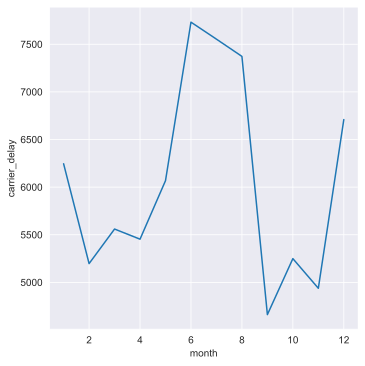

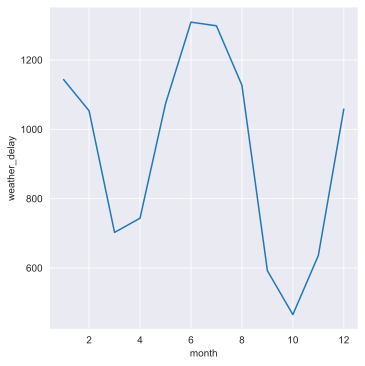

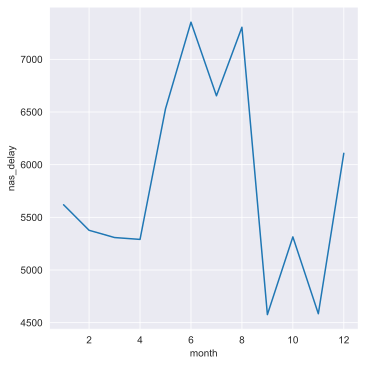

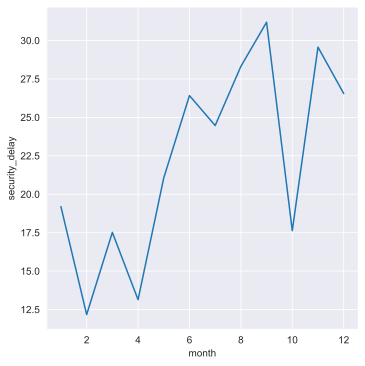

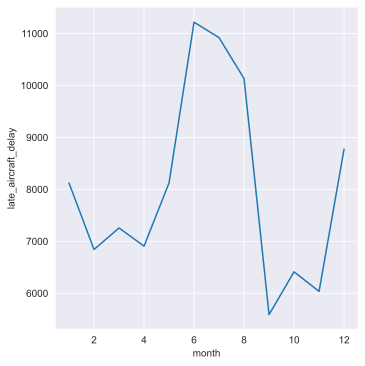

In [29]:
# explore whether there is any trend for each type of delay in the month of year during 2014 -2018

sns.relplot(data=delayreason_selected_airports, x='month', y='carrier_delay', kind='line', ci=None)
sns.relplot(data=delayreason_selected_airports, x='month', y='weather_delay', kind='line', ci=None)
sns.relplot(data=delayreason_selected_airports, x='month', y='nas_delay', kind='line', ci=None)
sns.relplot(data=delayreason_selected_airports, x='month', y='security_delay', kind='line', ci=None)
sns.relplot(data=delayreason_selected_airports, x='month', y='late_aircraft_delay', kind='line', ci=None)

- **Findings:** All 5 types of delay share the common pattern - Delay numbers have two peak periods, on prior & during Summer Holiday (May-Aug), another one on Christmas and New Year (Nov-Jan) 

### BTS Dataset - Distribution of Delay Types

In [32]:
# explore the distribution of various type of delay and which is the crucial type 

delaytype_df = delayreason_selected_airports[["carrier_delay", "weather_delay", "nas_delay", "security_delay", "late_aircraft_delay"]]


In [34]:
delaytype_df_sum = delaytype_df.sum()
delaytype_df_sum

carrier_delay          34251380.0
weather_delay           5281732.0
nas_delay              32977551.0
security_delay           125476.0
late_aircraft_delay    45371072.0
dtype: float64

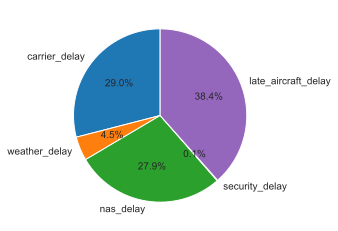

In [35]:
# get a pie chart to show the distribution

labels = 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'

fig1, ax1 = plt.subplots()
ax1.pie(delaytype_df_sum, labels=labels, autopct='%1.1f%%', startangle=90)

plt.show()

- **Findings:** **"Late Aircraft Delay"**, **"Carrier Delay"** & **"National Aviation System Delay"** are the top 3 reasons causing flight delay. Weather factor is just second least reason.

### Main Dataset - Descriptive Overview

In [40]:
df1 = pd.read_csv('final_dataset.csv')

### Delays by Airlines

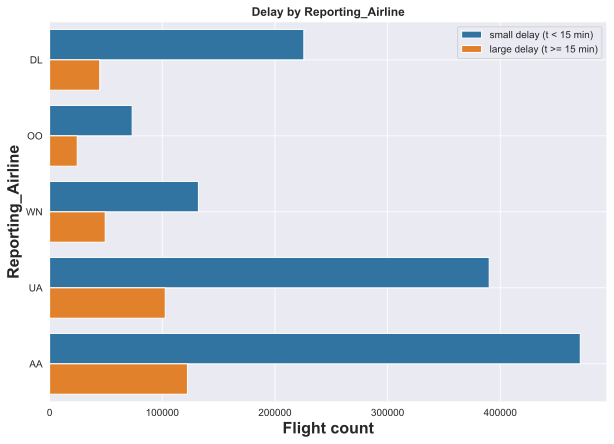

In [44]:
def delay_by_attribute(attribute, df=df1, figsize=(10, 7)):
    
    plt.figure(1, figsize=figsize)
    ax = sns.countplot(y=attribute, hue='ArrDel15', data=df1)
    
    plt.xlabel('Flight count', fontsize=16, weight='bold')
    plt.ylabel(attribute, fontsize=16, weight='bold')
    plt.title(f'Delay by {attribute}', weight='bold')
    L = plt.legend()
    L.get_texts()[0].set_text('small delay (t < 15 min)')
    L.get_texts()[1].set_text('large delay (t >= 15 min)')
    plt.grid(True)
    plt.show()

delay_by_attribute('Reporting_Airline')

### Delays by Departure & Arrival Airports

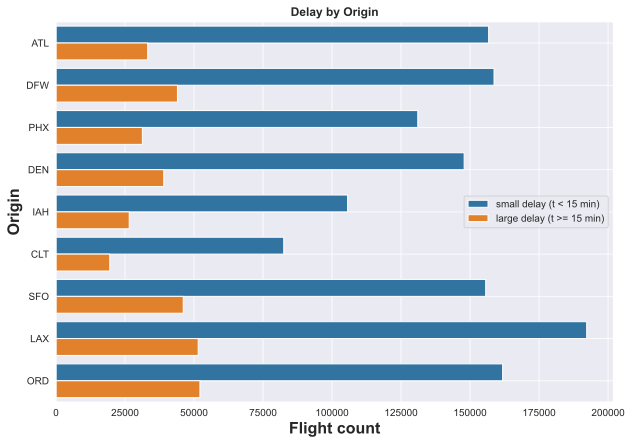

In [45]:
delay_by_attribute('Origin')

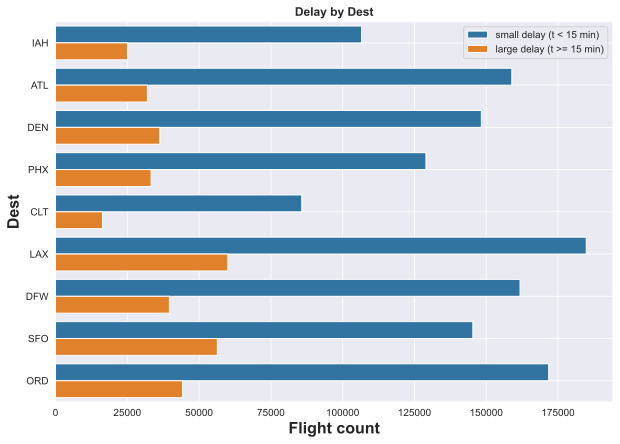

In [46]:
delay_by_attribute('Dest')

- **Findings:** Large delays mostly happended by departure airport and arrival airport:
       1. Los Angeles International Airport (LAX) - California
       2. San Francisco International Airport (SFO) - California
       3. O'Hare International Airport (ORD) - Illinois Chicago

### Delays by State

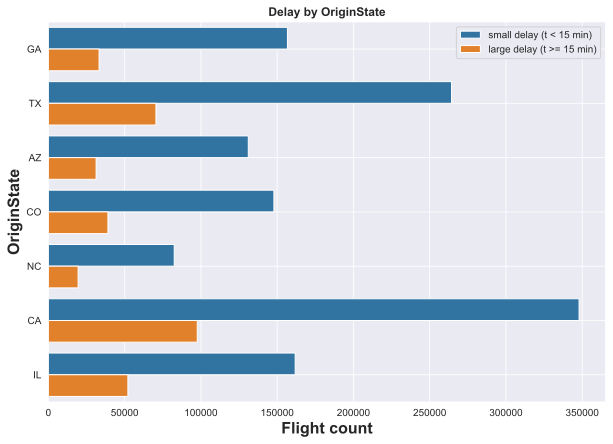

In [47]:
delay_by_attribute('OriginState')

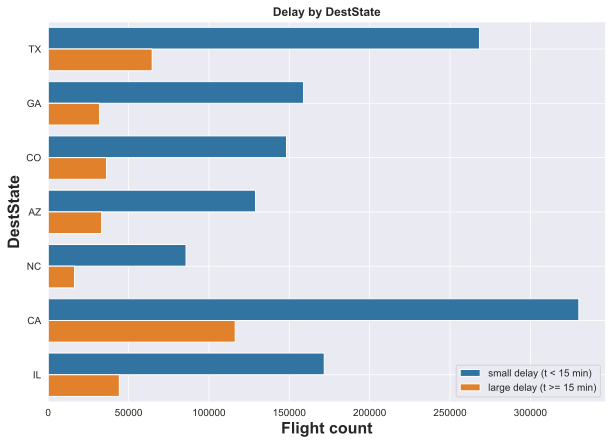

In [48]:
delay_by_attribute('DestState')

- **Findings:** Delays mostly happended on the state of **California** and **Texas**

### Delays by Month of year

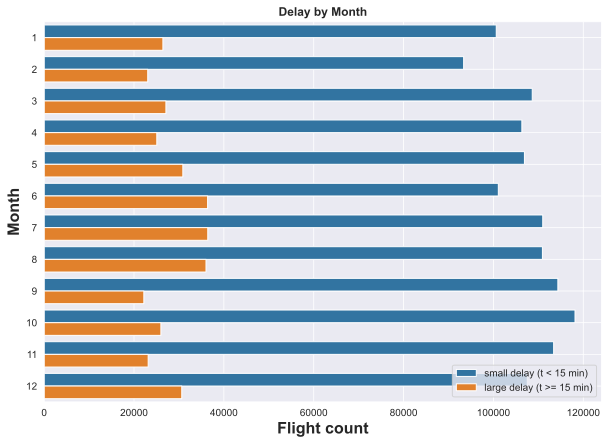

In [49]:
delay_by_attribute('Month')

### Delays by Days of week

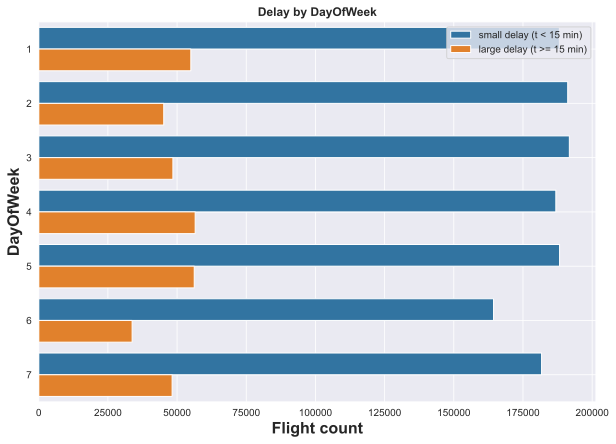

In [50]:
delay_by_attribute('DayOfWeek')

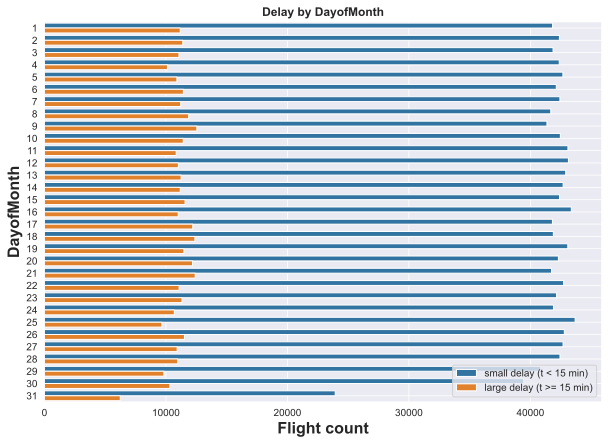

In [51]:
delay_by_attribute('DayofMonth')

## Summary:
- **"Late Aircraft Delay"**, **"Carrier Delay"** & **"National Aviation System Delay"** are the top 3 reasons causing flight delay. Weather factor is just second least reason.

- From BTS's website, all 5 types of delay share the common pattern - Delay numbers have two peak periods, on prior & during Summer Holiday (May-Aug), another one on Christmas and New Year (Nov-Jan). This pattern aligns with our main dataset.

- Large delays mostly happended by departure airport and arrival airport:
       1. Los Angeles International Airport (LAX) - California
       2. San Francisco International Airport (SFO) - California
       3. O'Hare International Airport (ORD) - Illinois Chicago
       
       
- Delays mostly happended on the state of **California** and **Texas**
